# Predicting the price of bulldozers using machine learning
> In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.gh minimises RMSLE.

## 1. Problem defition
* How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar 
  bulldozers have been sold for?

## 2. Data
* The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data
* There are 3 main datasets:
1. Train.csv is the training set, which contains data through the end of 2011.
2. Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of
   the competition. Your score on this set is used to create the public leaderboard.
3. Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1,2012-November 2012. Your score
   on the test set determines your final rank for the competition.

## 3. Evaluation
* The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
  For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation
* Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine        learning model which minimises RMSLE.


## 4. Features
* Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets:
  https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("Data/TrainAndValid.csv",low_memory=False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(412698, 53)

In [5]:
df.info

<bound method DataFrame.info of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand   

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

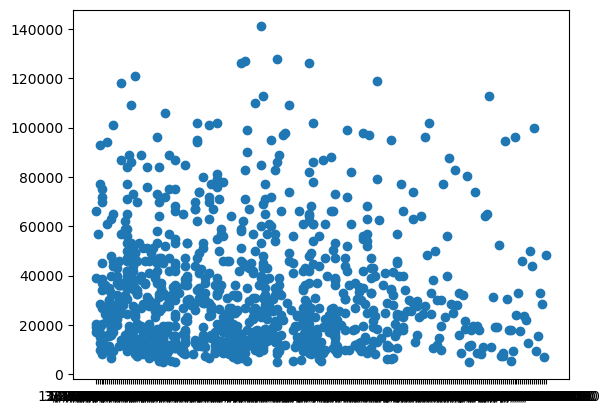

In [7]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<Axes: ylabel='Frequency'>

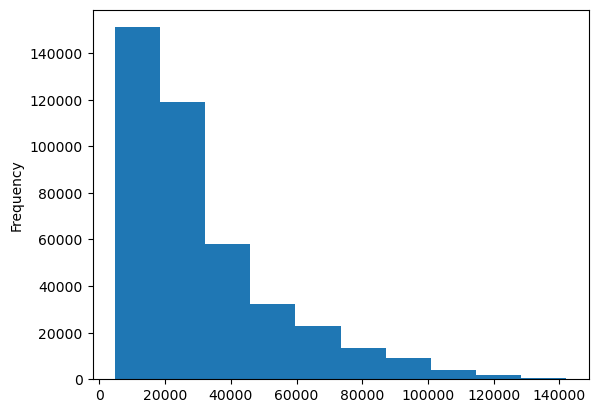

In [8]:
df.SalePrice.plot.hist()

## Parsing dates

* When we work with time series data, we want to enrich the time & date component as much as possible.
* We can do that by telling pandas which of our columns has dates in it using the parse_dates parameter.

In [9]:
df=pd.read_csv("Data/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])
df["saledate"].dtype

dtype('<M8[ns]')

In [10]:
df["saledate"][:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

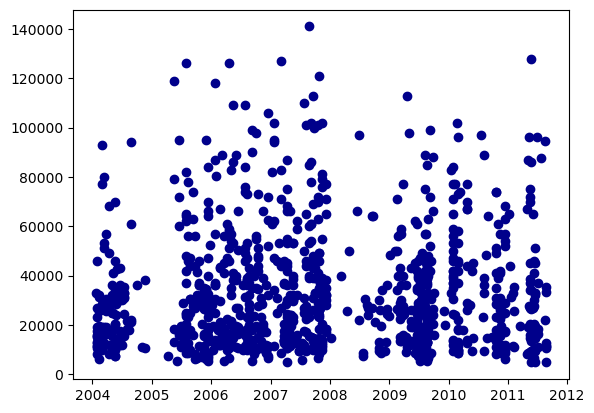

In [11]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000],color="darkblue")

In [12]:
#Sort data by saledate
df.sort_values(by=["saledate"],inplace=True,ascending=True)

In [13]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [14]:
#Make a copy
df_tmp=df.copy()

In [15]:
#ADD date-time parameter for saledate column 
df_tmp["saleyear"]=df_tmp.saledate.dt.year
df_tmp["salemonth"]=df_tmp.saledate.dt.month
df_tmp["saleday"]=df_tmp.saledate.dt.day
df_tmp.head(15)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31
54653,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,1989-01-31,...,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31
81383,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
204924,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31
135376,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31
113390,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,1,31


In [16]:
df_tmp["saleDayOfWeek"]=df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"]=df_tmp.saledate.dt.dayofyear
df_tmp.head(15).T

,205615,274835,141296,212552,62755,54653,81383,204924,135376,113390,113394,116419,32138,127610,76171
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,1449555,1453775,1264985,1475641,1364654
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,10500.0,20000.0,20000.0,23500.0,14000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,1102310,1514650,1204499,1194367,1270628
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,3356,7008,6788,7277,7289
datasource,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,1966,1974,1984,1973,1968
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [17]:
df_tmp.drop("saledate",axis=1,inplace=True)

In [18]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling
We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.

In [19]:
#Converting string to categories
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [20]:
for label, content in df_tmp.items():
    print(df_tmp[label].dtype)

int64
float64
int64
int64
int64
float64
int64
float64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
int32
int32
int32
int32
int32


In [21]:
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

* All the object dtypes are now converted to category type can be accesses as number

In [23]:
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [24]:
df_tmp.to_csv("Data/train_tmp.csv",index=False)

In [25]:
df_tmp=pd.read_csv("Data/train_tmp.csv")
df_tmp.head(15).T

C:\Users\hp\AppData\Local\Temp\ipykernel_11048\4161579098.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tmp=pd.read_csv("Data/train_tmp.csv")


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,1449555,1453775,1264985,1475641,1364654
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,10500.0,20000.0,20000.0,23500.0,14000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,1102310,1514650,1204499,1194367,1270628
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,3356,7008,6788,7277,7289
datasource,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,1966,1974,1984,1973,1968
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B,D6C,IT12,544,D5HII,12F,12F,225,580,950,980


In [26]:
#Fill missing values
 #Fill numeric missing values:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saleDayOfWeek
saleDayOfYear


In [27]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [28]:
#Fill numeric columns with median
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Add a binary column to show if the value was initially missing
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            df_tmp[label]=content.fillna(content.median())

In [29]:
df_tmp.auctioneerID_is_missing.value_counts(),df_tmp.MachineHoursCurrentMeter_is_missing.value_counts()

(auctioneerID_is_missing
 False    392562
 True      20136
 Name: count, dtype: int64,
 MachineHoursCurrentMeter_is_missing
 True     265194
 False    147504
 Name: count, dtype: int64)

In [30]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [31]:
#Fill categorical missing values:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add a binary column to show if the value was initially missing
        df_tmp[label+"_is_missing"]=pd.isnull(content)
        #Turn categories into numbers and add +1
        df_tmp[label]=pd.Categorical(content).codes+1
        #+1 so that the missing values do not have code -1 instead they have code 0

In [32]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [33]:
%%time
from sklearn.ensemble import RandomForestRegressor
#Instantiate Model
model=RandomForestRegressor(n_jobs=-1,random_state=42)
#Fit the Model
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

CPU times: total: 28min 25s
Wall time: 3min 12s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [34]:
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

0.9875468079970562

>Question: Why doesn't the above metric hold water? (why isn't the metric reliable)

In [35]:
df_tmp.saleyear.value_counts()

saleyear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

>The 2012 data is supposed to be validation set according to the challenge

In [36]:
#Split data into training and validation set
df_val=df_tmp[df_tmp.saleyear==2012]
df_train=df_tmp[df_tmp.saleyear!=2012]
len(df_val),len(df_train)

(11573, 401125)

In [37]:
#Split into x and Y
x_train,y_train=df_train.drop("SalePrice",axis=1),df_train["SalePrice"]
x_val,y_val=df_val.drop("SalePrice",axis=1),df_val["SalePrice"]
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Building an Evaluation Function

In [38]:
#We need RMSLE
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score
def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


def showScore(model):
    train_preds=model.predict(x_train)
    val_preds=model.predict(x_val)
    scores={"Training MAE":mean_absolute_error(y_train,train_preds),
            "Validation MAE":mean_absolute_error(y_val,val_preds),
            "Training RSMLE":rmsle(y_train,train_preds),
            "Validation RSMLE":rmsle(y_val,val_preds),
            "Training r2_score":r2_score(y_train,train_preds),
            "Validation r2_score":r2_score(y_val,val_preds)}
    return scores

## Testing the model on a subset (to tune hyperparameters)

In [39]:
#Change max sample value
model=RandomForestRegressor(n_jobs=-1,
                            random_state=42,
                            max_samples=10000)

In [40]:
%%time
model.fit(x_train,y_train)

CPU times: total: 55.8 s
Wall time: 9.01 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [41]:
showScore(model)

{'Training MAE': 5561.2988092240585,
 'Validation MAE': 7177.26365505919,
 'Training RSMLE': 0.257745378256977,
 'Validation RSMLE': 0.29362638671089003,
 'Training r2_score': 0.8606658995199189,
 'Validation r2_score': 0.8320374995090507}

In [42]:
%%time
#Hyperparameter tuning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf_grid={"n_estimators":np.arange(10,100,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_features":[0.5,1,"sqrt","auto"],
         "max_samples":[10000]}
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                            param_distributions=rf_grid,
                            n_iter=2,
                            cv=5,
                            verbose=True)
rs_model.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 12.1 s
Wall time: 8.69 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [43]:
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 18,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 3}

In [44]:
showScore(rs_model)

{'Training MAE': 11996.348796921246,
 'Validation MAE': 13805.974692963755,
 'Training RSMLE': 0.5137778711933977,
 'Validation RSMLE': 0.5243398140892886,
 'Training r2_score': 0.4721161499565695,
 'Validation r2_score': 0.4721114519512166}

* Following are the ideal parameters, giving the lowest rsmle score.
> These parameters have been taken from other models traned by other users

In [45]:
ideal_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None)
ideal_model.fit(x_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [46]:
showScore(ideal_model)

{'Training MAE': 2955.4927053170463,
 'Validation MAE': 5958.054736800365,
 'Training RSMLE': 0.14451891761325952,
 'Validation RSMLE': 0.24696049960036154,
 'Training r2_score': 0.9588499147848124,
 'Validation r2_score': 0.8817445011816822}

# Make predictions on test data

In [68]:
df_test=pd.read_csv("Data/Test.csv",low_memory=False,parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [69]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleyear"] = df.saledate.dt.year
    df["salemonth"] = df.saledate.dt.month
    df["saleday"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

> After preprocessing the data, we can use the ideal_model to make predictions on any test data.

# Feature Importance

In [83]:
id_mod=ideal_model.feature_importances_
id_mod

array([3.32359010e-02, 1.80580340e-02, 4.62493758e-02, 1.74871237e-03,
       3.33192012e-03, 2.02178701e-01, 3.21421916e-03, 1.07854915e-03,
       4.14003330e-02, 4.30136692e-02, 6.39540606e-02, 5.03383369e-03,
       1.44702610e-02, 1.46179660e-01, 4.91531919e-02, 5.97527673e-03,
       1.43034606e-03, 3.15423956e-03, 3.13562848e-03, 6.29527889e-02,
       6.04600989e-04, 7.22082524e-05, 1.34212689e-03, 2.16532111e-04,
       1.35526144e-03, 3.16580047e-05, 1.07193394e-04, 1.03681607e-02,
       3.93211006e-04, 4.53249872e-03, 2.16379263e-03, 1.33543163e-03,
       4.48030842e-03, 6.34552222e-04, 2.38240386e-04, 1.31133368e-02,
       9.93337586e-04, 9.83481955e-03, 4.21739965e-03, 1.51091511e-03,
       6.97283851e-04, 8.75894608e-04, 1.20860777e-03, 5.60035814e-04,
       5.06105977e-04, 3.41469434e-04, 1.82376603e-04, 2.76611112e-03,
       1.15669137e-03, 2.67592542e-04, 3.06144532e-04, 7.40549882e-02,
       3.79159421e-03, 5.67346421e-03, 2.96452208e-03, 9.87146312e-03,
      

In [85]:
def plot_feature(column,importances,n=20):
    df=(pd.DataFrame({"features":column,
                     "feature_importance":importances})
                      .sort_values("feature_importance",ascending=False)
                      .reset_index(drop=True))
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importance"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

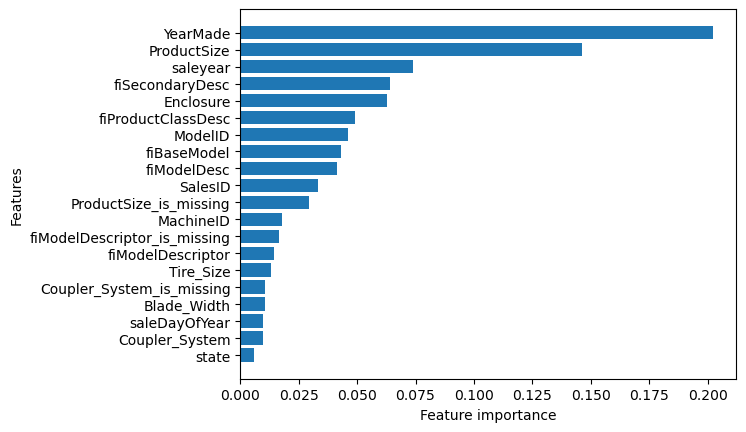

In [86]:
plot_feature(x_train.columns, id_mod)